# Flight Fare Prediction

import the relevant libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [110]:
train_data=pd.read_excel(r"D:\flightprediction\Data_Train.xlsx")

In [111]:
print("Number of rows in training dataset",train_data.shape)

Number of rows in training dataset (10683, 11)


In [112]:
pd.set_option('display.max_columns', None)

In [113]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [114]:
#checking the missing values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [115]:
#dropping the missing values
train_data.dropna(inplace=True)

In [116]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = train_data[train_data.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(220, 11)

In [117]:
#remove duplicate rows in training dataset
train_data.drop_duplicates(keep='first',inplace=True)

In [118]:
train_data["Duration"].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
19h 50m      1
35h 20m      1
31h 50m      1
13h 35m      1
47h          1
Name: Duration, Length: 368, dtype: int64

In [119]:
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [120]:
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [121]:
train_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [122]:
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [123]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [124]:
train_data.drop(["Dep_Time"], axis=1, inplace=True)

In [125]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [126]:
train_data["Arrival_hour"]=pd.to_datetime(train_data.Arrival_Time).dt.hour

train_data["Arrival_min"]=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [127]:
train_data.drop(["Arrival_Time"], axis=1, inplace=True)

In [128]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [129]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins

In [130]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [131]:
train_data.drop(["Duration"], axis=1, inplace=True)

# Handling the data

In [132]:
train_data["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

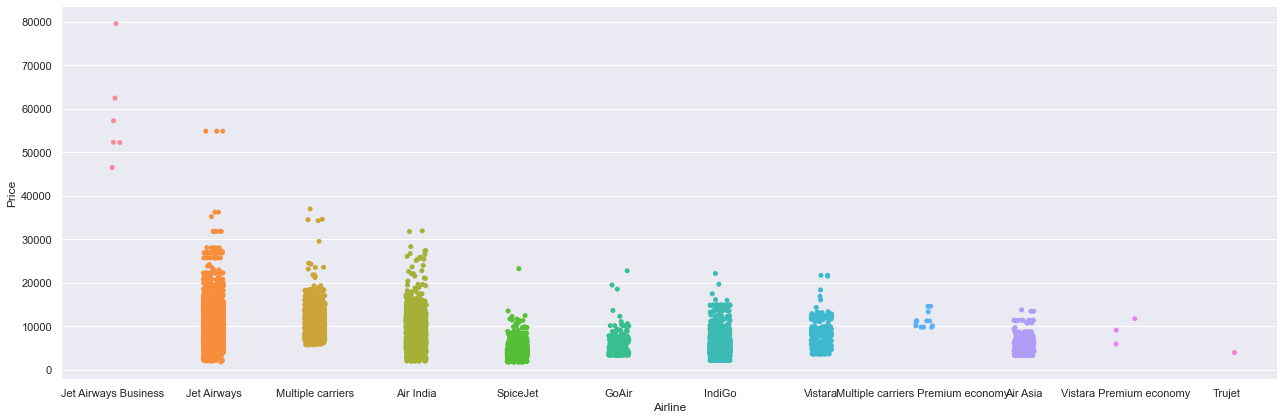

In [133]:
sns.catplot(y="Price", x="Airline", data=train_data.sort_values("Price", ascending=False), height=6, aspect=3)
plt.show()

In [134]:
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [135]:
train_data["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

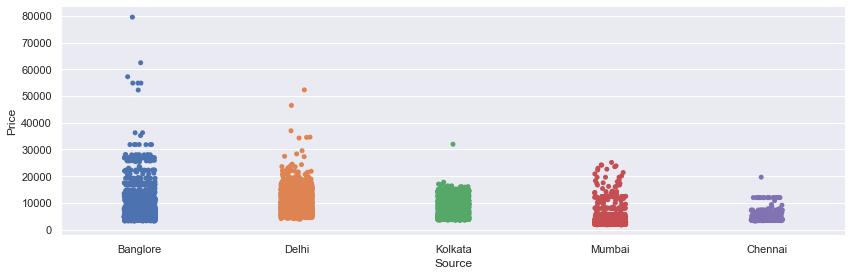

In [136]:
sns.catplot(y="Price", x="Source", data=train_data.sort_values("Price", ascending=False), height=4, aspect=3)

In [137]:
Source=train_data[["Source"]]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [138]:
train_data["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [139]:
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [140]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10462, dtype: object

In [141]:
train_data.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [142]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [143]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [144]:
train_data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

In [145]:
data_train=pd.concat([train_data, Airline, Source, Destination], axis=1)

In [146]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [147]:
data_train.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)


In [148]:
data_train.shape

(10462, 30)

# Test Set
Repeating the same pre-processing steps for test set.
We are doing the steps seperately for test data so as to avoid data leakage.

In [149]:
test_data=pd.read_excel(r"C:\Users\ANMOL\Test_set.xlsx")

In [150]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [151]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [47]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Shape of t

In [152]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [153]:
data_train.shape

(10462, 30)

In [154]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [155]:
y=data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

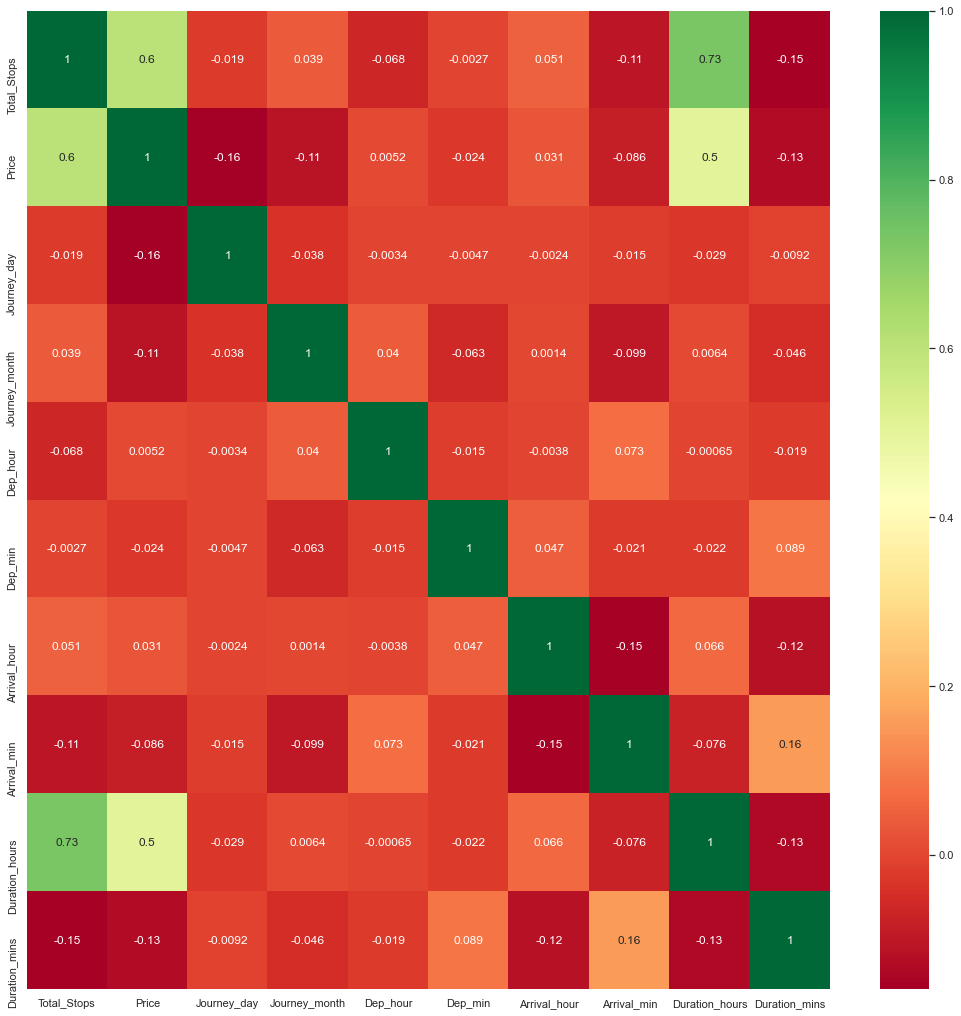

In [156]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")
plt.show()

# Model
Applying different algorithms.

We will be using algorithms like Random Forest, Linear Regression.

Then we will optimize our algorithms using GridSearchCV and RandomSearchCV.

In [157]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error

# We have created a function to print accuracy metrics which can be used

def print_accuracy_report(y_test, y_pred,X_test, model):
    print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [164]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor))
    return regressor
linearModel = LinearRegressionModel(X,y)

R Squared(Accuracy) 0.6108234026597613
Mean Absolute Error: 1978.3411577906284
Mean Squared Error: 8082649.14611464
Root Mean Squared Error: 2843.0000256972635
Root Mean Squared Log Error 0.2982335926112454
None


In [165]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score
def BayesianRidgeModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    regressor = BayesianRidge()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor))
    return regressor
linearModel = BayesianRidgeModel(X,y)

R Squared(Accuracy) 0.6106771746470644
Mean Absolute Error: 1978.8922527592288
Mean Squared Error: 8085686.095741211
Root Mean Squared Error: 2843.534085559941
Root Mean Squared Log Error 0.2982723670443744
None


Random Forest Classifier

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state =42)

In [167]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train, y_train)

C:\Users\ANMOL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [168]:
y_pred=reg_rf.predict(X_test)

In [169]:
reg_rf.score(X_train, y_train)

0.9397588997965312

In [170]:
reg_rf.score(X_test, y_test)

0.7945656506536888

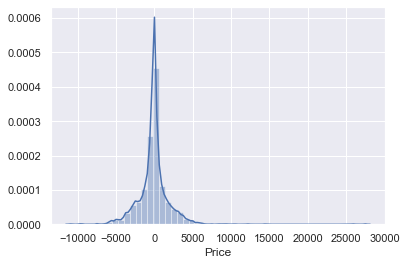

In [171]:
sns.distplot(y_test-y_pred)
plt.show()

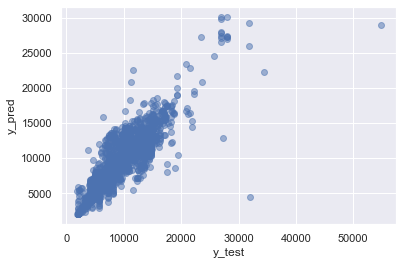

In [172]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [173]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1229.0663832768334
MSE: 4283362.961386279
RMSE: 2069.628701334198


In [174]:
metrics.r2_score(y_test, y_pred)

0.7945656506536888

In [175]:
#ExtraTreesRegressor helps to find out the feature importance
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

C:\Users\ANMOL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

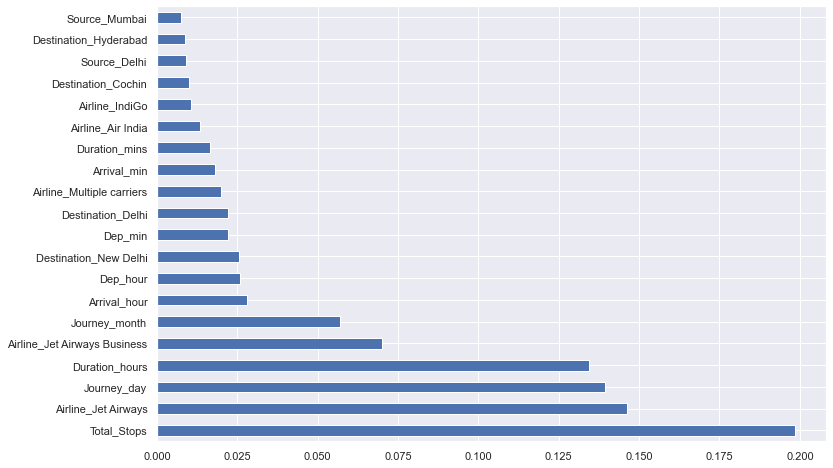

In [176]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

# Hyperparameter Tuning/Optimization

RandomizedSearchCV

In [177]:
from sklearn.model_selection import RandomizedSearchCV

In [178]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [179]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [182]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [184]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [185]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

GridSearchCV

In [186]:
import matplotlib.pylab as plt
import numpy as np 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVGradientBoostingRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=42, test_size=0.3)
    estimator = GradientBoostingRegressor(random_state=42,n_estimators=800,learning_rate=0.05,max_depth=8)
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    param_grid={ 
                'subsample':[1.0]
               } 
    n_jobs=8
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(X_test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_
gradientBoostingModelCV = GridSearchCVGradientBoostingRegressor(X,y)

{'subsample': 1.0}
R Squared(Accuracy) 0.7997242408577914
Mean Absolute Error: 1248.067976075867
Mean Squared Error: 4159445.1071348204
Root Mean Squared Error: 2039.4717715954837
Root Mean Squared Log Error 0.2042236931066667
None


In [188]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
params = {
  'reg_alpha':[1e-5]
}
def XGBoostRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf=XGBRegressor(learning_rate =0.1, n_estimators=240,
     subsample=0.8, colsample_bytree=0.8,
     scale_pos_weight=1, seed=42, max_depth= 10, min_child_weight=5,gamma=0.0, reg_alpha=1e-5)
    rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_
xgBoostModel = XGBoostRegressorModel(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   26.4s finished


{'reg_alpha': 1e-05}
R Squared(Accuracy) 0.8020947790275849
Mean Absolute Error: 1237.7437767084712
Mean Squared Error: 4110212.3720606645
Root Mean Squared Error: 2027.3658703008355
Root Mean Squared Log Error 0.19954699016362765
None


In [189]:
# we can use SelectFromModel module to select most appropriate features 
# automatically. 
# Source:- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
import numpy as np
from sklearn.feature_selection import SelectFromModel
def SelectFeaturesFromModel (model,X):
    sel = SelectFromModel(model, prefit = True)
    selected_feat= X.columns[(sel.get_support())]
    print("Total features selected: ", len(selected_feat))
    print("Names of selected Features:\n", selected_feat)
    print("\n")

In [190]:
print("Top selected from xgboost regressor:")
SelectFeaturesFromModel(xgbRegressorModel,X)

Top selected from xgboost regressor:
Total features selected:  9
Names of selected Features:
 Index(['Total_Stops', 'Journey_month', 'Duration_hours', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_SpiceJet', 'Destination_Delhi', 'Destination_Hyderabad'],
      dtype='object')




In [191]:
from sklearn.svm import SVR
def SVRModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    regressor=SVR(kernel='linear',degree=1)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor))
    return regressor
svRegressorModel = SVRModel(X,y)

R Squared(Accuracy) 0.39794223327252287
Mean Absolute Error: 2274.067148666135
Mean Squared Error: 12503890.849061571
Root Mean Squared Error: 3536.0841122718743
Root Mean Squared Log Error 0.3258480131681399
None


In [192]:
prediction=rf_random.predict(X_test)

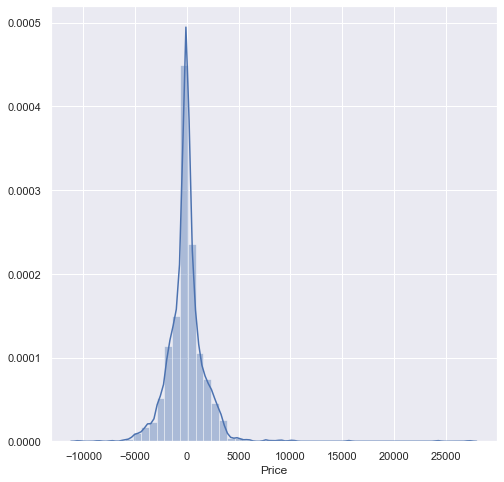

In [193]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

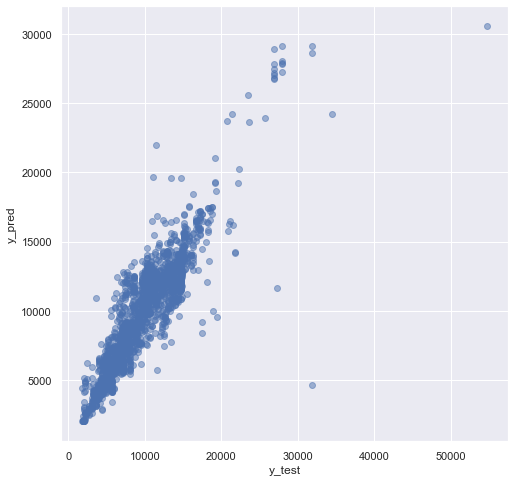

In [194]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

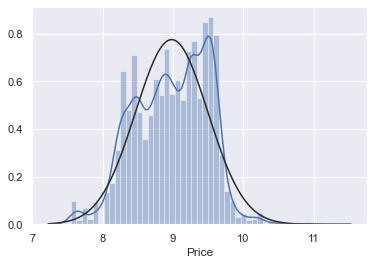

In [195]:
from scipy.stats import norm, skew 
sns.distplot(np.log1p(train_data["Price"]) , fit=norm);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


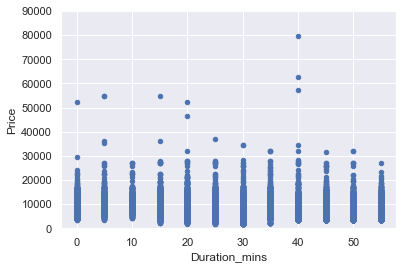

In [196]:
var = 'Duration_mins'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,90000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


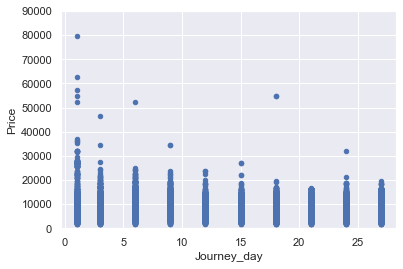

In [197]:


var = 'Journey_day'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,90000));

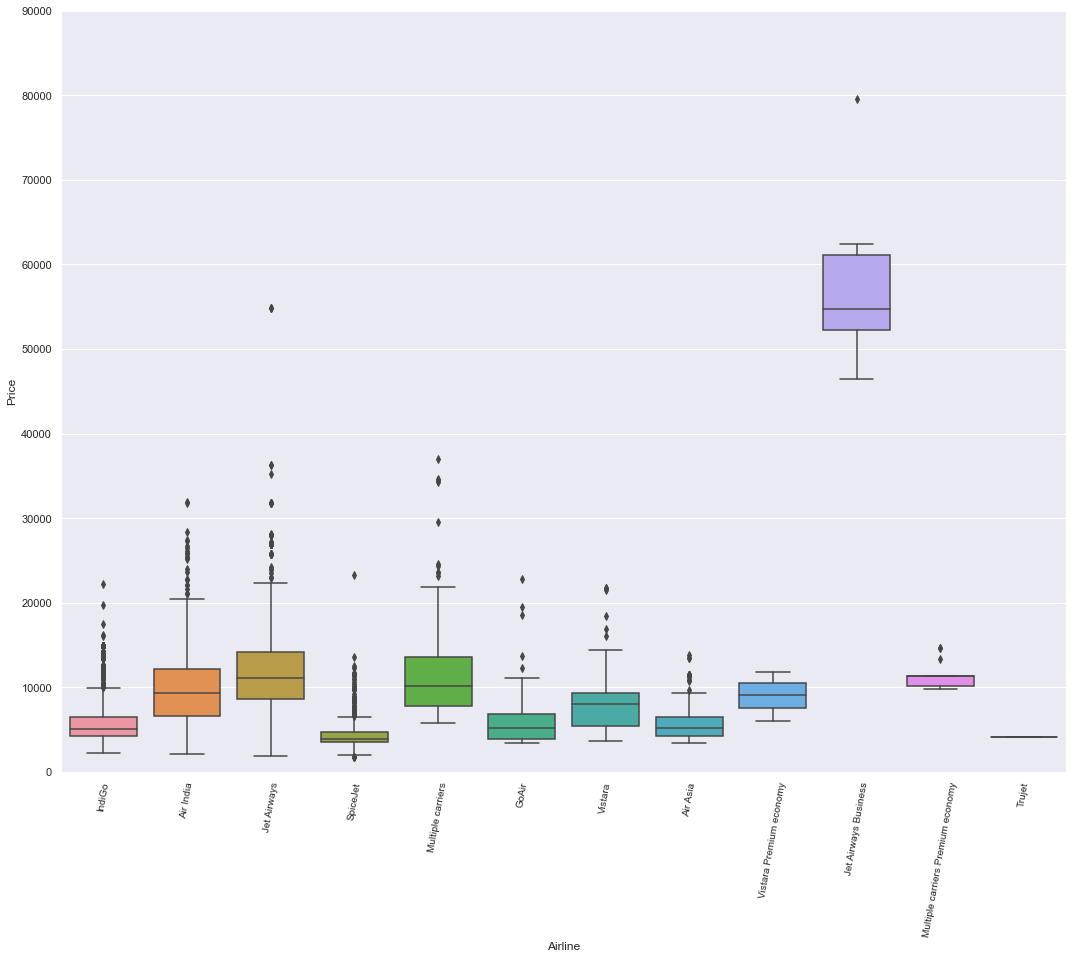

In [198]:
var = 'Airline'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 14))
fig = sns.boxplot(x=var, y="Price", data=data)
plt.xticks(fontsize=10, rotation=80)
fig.axis(ymin=0, ymax=90000);

Text(0.5, 1.0, 'Total stops')

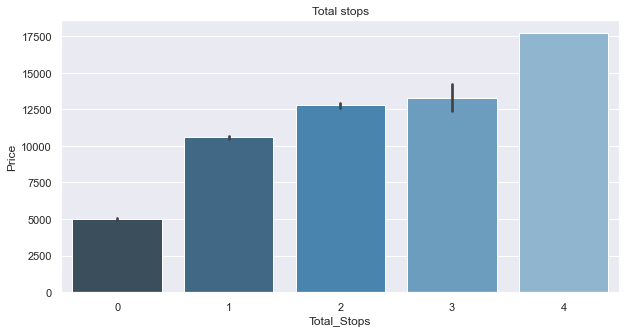

In [199]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Total_Stops", y="Price", data=train_data, palette="Blues_d")
plt.title('Total stops')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

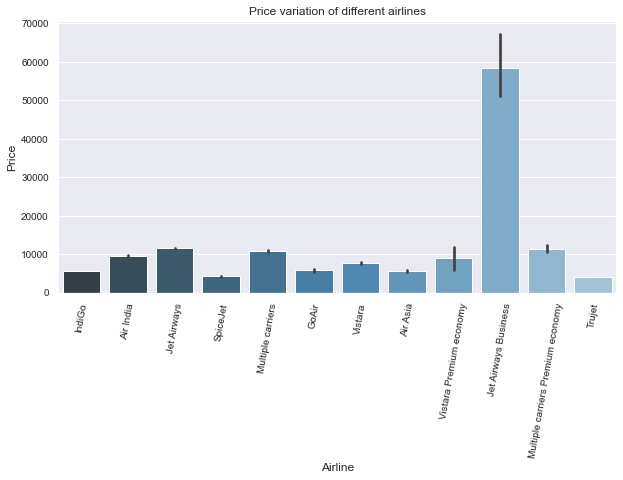

In [200]:
sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Airline", y="Price", data=train_data, palette="Blues_d")
plt.title('Price variation of different airlines')
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)


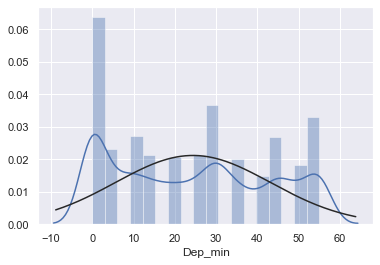

In [201]:
from scipy.stats import norm, skew 
sns.distplot(train_data["Dep_min"] , fit=norm);

In [202]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1147.4739748851516
MSE: 3505108.8430579044
RMSE: 1872.1935912340648


# Save the model

In [76]:
import pickle
file=open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [77]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [78]:
y_prediction = forest.predict(X_test)

In [79]:
metrics.r2_score(y_test, y_prediction)

0.8315855633402115